# **Создание класса для работы с Hash Set"ом**
Для работы нам потребуется несколько основных методов.

---
```python
def __init__(self) -> None:
    self.hash_set: dict = {0: set()}
    self.count_values: int = 0
    self.divider: int = len(self.__hash_set)
    self.bucket: int | None = None
```
- Тут происходит простая инициализация всех данных для работы класса. То есть, мы инициализируем сам **Hash Set**, количество элементов внутри него и делитель (равный количеству **bucket** в текущий момент)
---

```python
def existence(self, value: any) -> bool:
```
- Проверка наличия ключа внутри `set`
---
```python
def generate_new_dict(self, _type: int = 1) -> None:
```
- Генерация нового **Hash Set**. Есть 2 типа генерации
  - `1` - Увеличивает количество `bucket` в **2 раза**
  - `other` - Уменьшает количество `bucket` в **2 раза**
---
```python
def append(self, value: any) -> None:
```
- Метод добавляет новый элемент в `set`. Но перед этим проверяет наличие значения внутри **Hash Set**. Если значения не будет, то идет проверка с количеством элементов внутри **Hash Set**. Если элементов стало столько же, сколько и количество `bucket` внутри **Hash Set**, тогда вызываем метод:
```python
generate_new_dict(_type=1)
```
Если элемент уже есть, тогда мы просто ничего не добавляем.
---
```python
def remove(self, value: any) -> None:
```
- Метод удаляет существующий элемент в `set`. Но перед этим проверяет наличие значения внутри **Hash Set**. Если значение будет, то идет проверка с количеством элементов внутри **Hash Set**. Если элементов стало столько же, сколько и количество `bucket / 2` внутри **Hash Set**, тогда вызываем метод:
```python
generate_new_dict(_type=0)
```
Если элемента нет, тогда мы просто ничего не добавляем.

In [1]:
"""Module providing a function printing python version."""


class HashSet:
    """Hash set example."""

    def __init__(self) -> None:
        """
        HashSet initialization class
        """
        self.hash_set: dict = {0: set()}
        self.count_values: int = 0
        self.divider: int = len(self.hash_set)
        self.bucket: int | None = None

        print("\n[SYSTEM] - Init hash set!")

    def existence(self, value: any) -> bool:
        """
        Check key in HashSet
        :param value:
        :return:
        """
        self.bucket: int = hash(value) % self.divider

        return value in self.hash_set[self.bucket]

    def generate_new_dict(self, _type: int = 1) -> None:
        """
        Update count buckets in HashSet and update position elements in buckets
        :param _type: 1 = Positive, other = Negative
        """
        if _type == 1:
            self.divider: int = self.divider * 2
        else:
            self.divider: int = round(self.divider / 2)

        new_hash_set = {}

        for start in range(0, self.divider):
            new_hash_set[start]: set = set()

        for start, __value in enumerate(self.hash_set.keys()):
            for _value in self.hash_set[start]:
                bucket: int = hash(_value) % self.divider
                new_hash_set[bucket].add(_value)

        self.hash_set = new_hash_set

    def append(self, value: any) -> None:
        """
        Add new value in HashSet
        :param value:
        """
        if not self.existence(value):
            if self.count_values == len(self.hash_set):
                self.generate_new_dict()

            self.hash_set[self.bucket].add(value)
            self.count_values += 1

    def remove(self, value: any) -> None:
        """
        Remove value in HashSet
        :param value:
        """
        if self.existence(value):
            if self.count_values == round(len(self.hash_set) / 2):
                self.generate_new_dict(_type=0)

            self.hash_set[self.bucket].remove(value)
            self.count_values -= 1


---

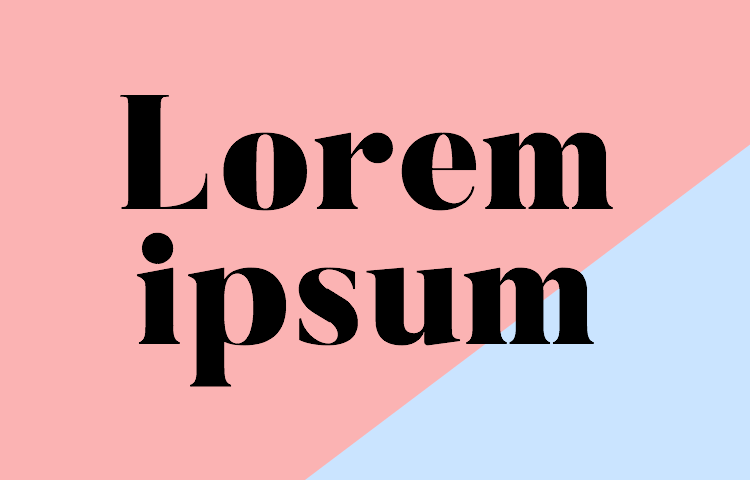

---

Дальше мы создаем новый файл `output.json`. В котором и будет храниться **Hash Set**. Файл нужен для наглядной демонстрации того, как на основе **lorem impsum** будет сгенерирован **Hash Set**

Также мы дополнительно убираем лишние символы, чтобы оставить исключительно слова.

In [2]:
import json
import re


def set_default(obj):
    """
    set replace to list type

    :param obj:
    :return:
    """
    if isinstance(obj, set):
        return list(obj)
    raise TypeError


if __name__ == '__main__':
    print(f"\n[System] - Start")

    hash_object = HashSet()

    with open('../lorem_ipsum.txt', encoding='UTF-8') as file:
        contents = file.read()

        for word in contents.split():
            hash_object.append(
                re.sub("['\"!@#$%^&*()-_=+/\\,.|]", '', word)
            )

    with open('../output.json', 'w', encoding='UTF-8') as file:
        json.dump(
            obj=hash_object.hash_set,
            default=set_default,
            fp=file
        )

    print(f"\n[System] - End")


[System] - Start

[SYSTEM] - Init hash set!

[System] - End


---
Здесь мы создаем список `without_hash`. Его мы будем использовать для независимого тестирования скорости обработки поиска элемента внутри.

In [3]:
without_hash = list()

for bucket in hash_object.hash_set.keys():
  for element in hash_object.hash_set[bucket]:
    without_hash.append(element)

print(json.dumps(without_hash))

["interdum", "inceptos", "lacinia", "facilisis", "a", "ultricies", "varius", "litora", "estibulum", "diam", "parturient", "libero", "condimentum", "am", "hac", "nascetur", "odio", "mauris", "pulvinar", "orci", "commodo", "sagittis", "bibendum", "aliquet", "nostra", "ac", "accumsan", "quam", "lobortis", "lass", "posuere", "penatibus", "nteger", "hasellus", "ivamus", "tellus", "natoque", "ad", "ornare", "tempor", "arcu", "dignissim", "vitae", "usce", "at", "tortor", "ullam", "sed", "tristique", "enim", "amet", "morbi", "sapien", "aecenas", "onec", "dictumst", "montes", "platea", "in", "nterdum", "facilisi", "tincidunt", "sem", "eros", "n", "nunc", "malesuada", "nisl", "ligula", "fames", "metus", "ulla", "rhoncus", "auris", "maximus", "suscipit", "ex", "pellentesque", "ullamcorper", "cursus", "justo", "elit", "taciti", "iaculis", "feugiat", "auctor", "congue", "ridiculus", "ut", "consectetur", "leo", "magnis", "ed", "lorem", "hendrerit", "neque", "lacus", "senectus", "urabitur", "urna", "



---



Далее идет подключение зависимостей для тестирования скорости.

- `time` - нужен для подсчета времени работы.
- `random` - нужен для выборки любого элемента из `without_hash`

In [4]:
import time
import random



---



В этом тесте будет проверенно `10 000 000` раз операция поиска внутри **Hash Set**. Значения будут браться псевдо-рандомным способом.

> `100 000 000` записей заняло по времени: `132.4818253517151 секунд => 2 минуты 12 секунд` (Google)

In [5]:
# начальное время
start_time = time.time()

for start in range(1, 10_000_000):
  hash_object.existence(random.choice(without_hash))

# конечное время
end_time = time.time()

# разница между конечным и начальным временем
result = end_time - start_time

print('Затраченное время:', round(result, 4), 'секунд')

Затраченное время: 4.0526 секунд




---


В этом тесте будет проверенно `10 000 000` раз операция поиска внутри списка. Значения будут браться псевдо-рандомным способом.

> `100 000 000` записей заняло по времени: `250.30208706855774 => 4 минуты 10 секунд` (Google)

In [6]:
# начальное время
start_time = time.time()

for start in range(1, 10_000_000):
  key_exists = random.choice(without_hash) in without_hash

# конечное время
end_time = time.time()

# разница между конечным и начальным временем
result = end_time - start_time

print('Затраченное время:', round(result, 4), 'секунд')

Затраченное время: 8.2777 секунд
